In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('diamonds.csv')
data

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749.0
1,2.25,Fair,G,I1,7069.0
2,0.70,Very Good,E,VS2,2757.0
3,0.47,Good,F,VS1,1243.0
4,0.30,Ideal,G,VVS1,789.0
...,...,...,...,...,...
49995,0.71,Ideal,H,VVS1,2918.0
49996,0.43,Ideal,G,VVS2,1056.0
49997,1.14,Premium,G,VS2,6619.0
49998,1.01,Premium,E,VS2,6787.0


In [3]:
data.head()

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749.0
1,2.25,Fair,G,I1,7069.0
2,0.70,Very Good,E,VS2,2757.0
3,0.47,Good,F,VS1,1243.0
4,0.30,Ideal,G,VVS1,789.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49994 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   price    49997 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.describe()

,carat,price
count,49994.000000,4.999700e+04
mean,0.798602,1.672039e+06
std,0.474653,3.729873e+08
min,0.200000,3.260000e+02
25%,0.400000,9.480000e+02
50%,0.700000,2.403000e+03
75%,1.040000,5.331000e+03
max,5.010000,8.340000e+10


In [6]:
data.drop([10], axis = 0, inplace = True)

In [7]:
data.describe()

,carat,price
count,49993.000000,49996.000000
mean,0.798610,3939.166393
std,0.474654,3995.959008
min,0.200000,326.000000
25%,0.400000,948.000000
50%,0.700000,2403.000000
75%,1.040000,5331.000000
max,5.010000,18823.000000


In [8]:
data.isnull().sum()

carat      6
cut        0
color      0
clarity    0
price      3
dtype: int64

In [9]:
data.dropna(axis=0, inplace=True) #I could fill the nulls with regression models or with statistical approach 
#but number of nulls are small and we have enough data.

In [10]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

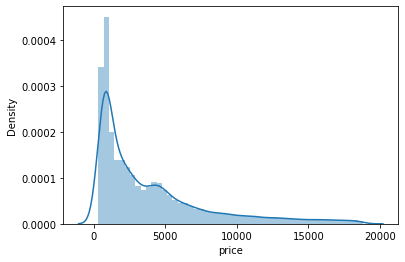

In [11]:
sns.distplot(data['price']);

Positive Skewness: Model will perform better on lower price.

In [12]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 1.612684
Kurtosis: 2.148599


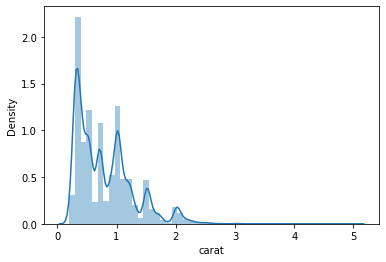

In [13]:
sns.distplot(data['carat']);

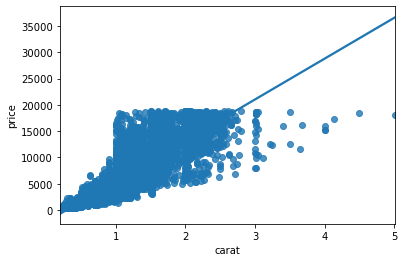

In [14]:
ax=sns.regplot(x='carat',y='price',data=data)
plt.show()

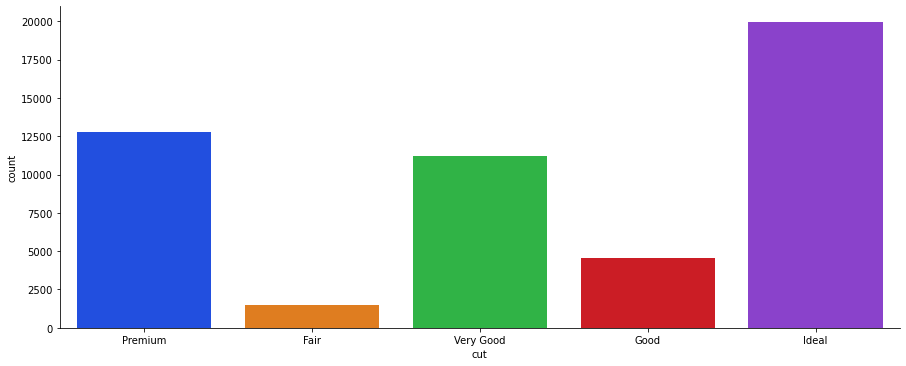

In [15]:
palette = sns.color_palette("bright",9)
sns.factorplot(x='cut', data=data , kind='count',aspect=2.5, palette=palette )

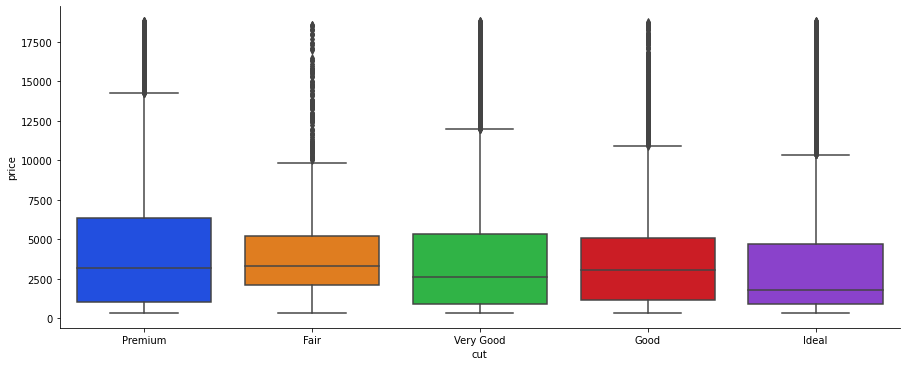

In [16]:
sns.factorplot(x='cut', y='price', data=data, kind='box' ,aspect=2.5, palette=palette )

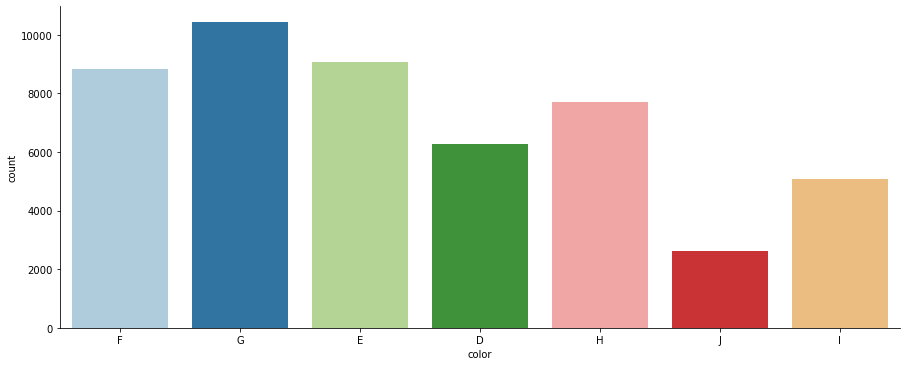

In [17]:
sns.factorplot(x='color', data=data , kind='count',aspect=2.5, palette="Paired" )

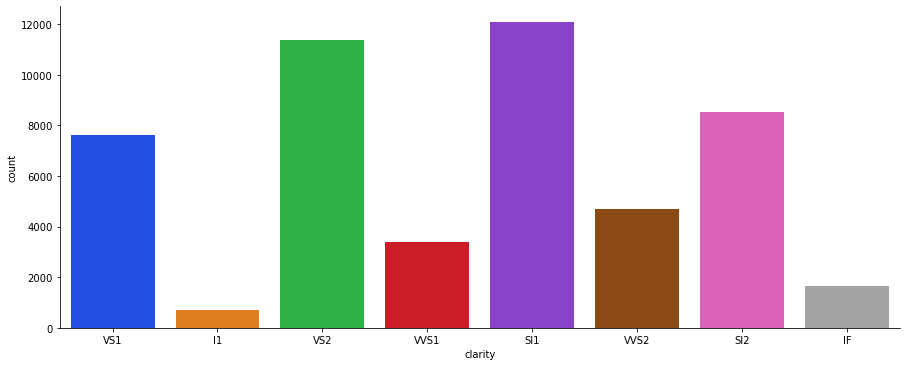

In [18]:
sns.factorplot(x='clarity', data=data , kind='count',aspect=2.5, palette=palette )

In [19]:
print(f' Cut column has {len(data.cut.unique())} unique values: {data.cut.unique()}')
print(f' Color column has {len(data.color.unique())} unique values: {data.color.unique()}')
print(f' Clarity column has {len(data.clarity.unique())} unique values: {data.clarity.unique()}')

 Cut column has 5 unique values: ['Premium' 'Fair' 'Very Good' 'Good' 'Ideal']
 Color column has 7 unique values: ['F' 'G' 'E' 'D' 'H' 'J' 'I']
 Clarity column has 8 unique values: ['VS1' 'I1' 'VS2' 'VVS1' 'SI1' 'VVS2' 'SI2' 'IF']


<AxesSubplot:xlabel='clarity', ylabel='price'>

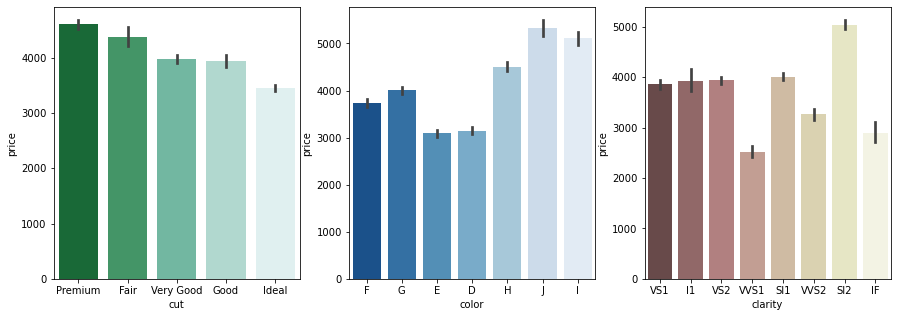

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(x='cut', y='price', data=data, ax=axs[0], palette='BuGn_r')
sns.barplot(x='color', y='price', data=data, ax=axs[1],palette='Blues_r')
sns.barplot(x='clarity',y='price', data=data, ax=axs[2],palette='pink')

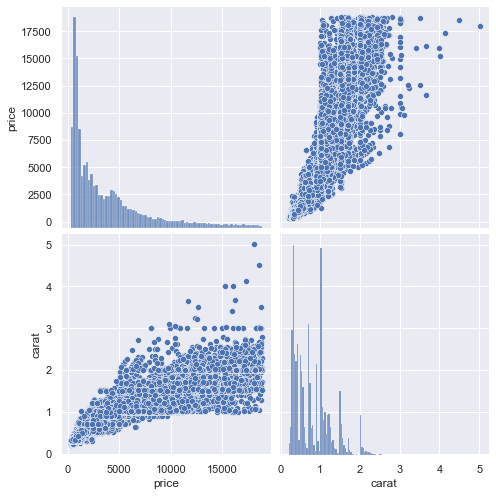

In [21]:
sns.set()
cols = ['price', 'carat']
sns.pairplot(data[cols], size = 3.5)
plt.show();

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

Since there is no categorical variable which has only 2 categories, I will apply One-Hot Encoding for any categorical variables. 

In [22]:
data=pd.get_dummies(data)
data.head()

,carat,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,1749.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2.25,7069.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.70,2757.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.47,1243.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.30,789.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
print('Data shape: ', data.shape)

Data shape:  (49990, 22)


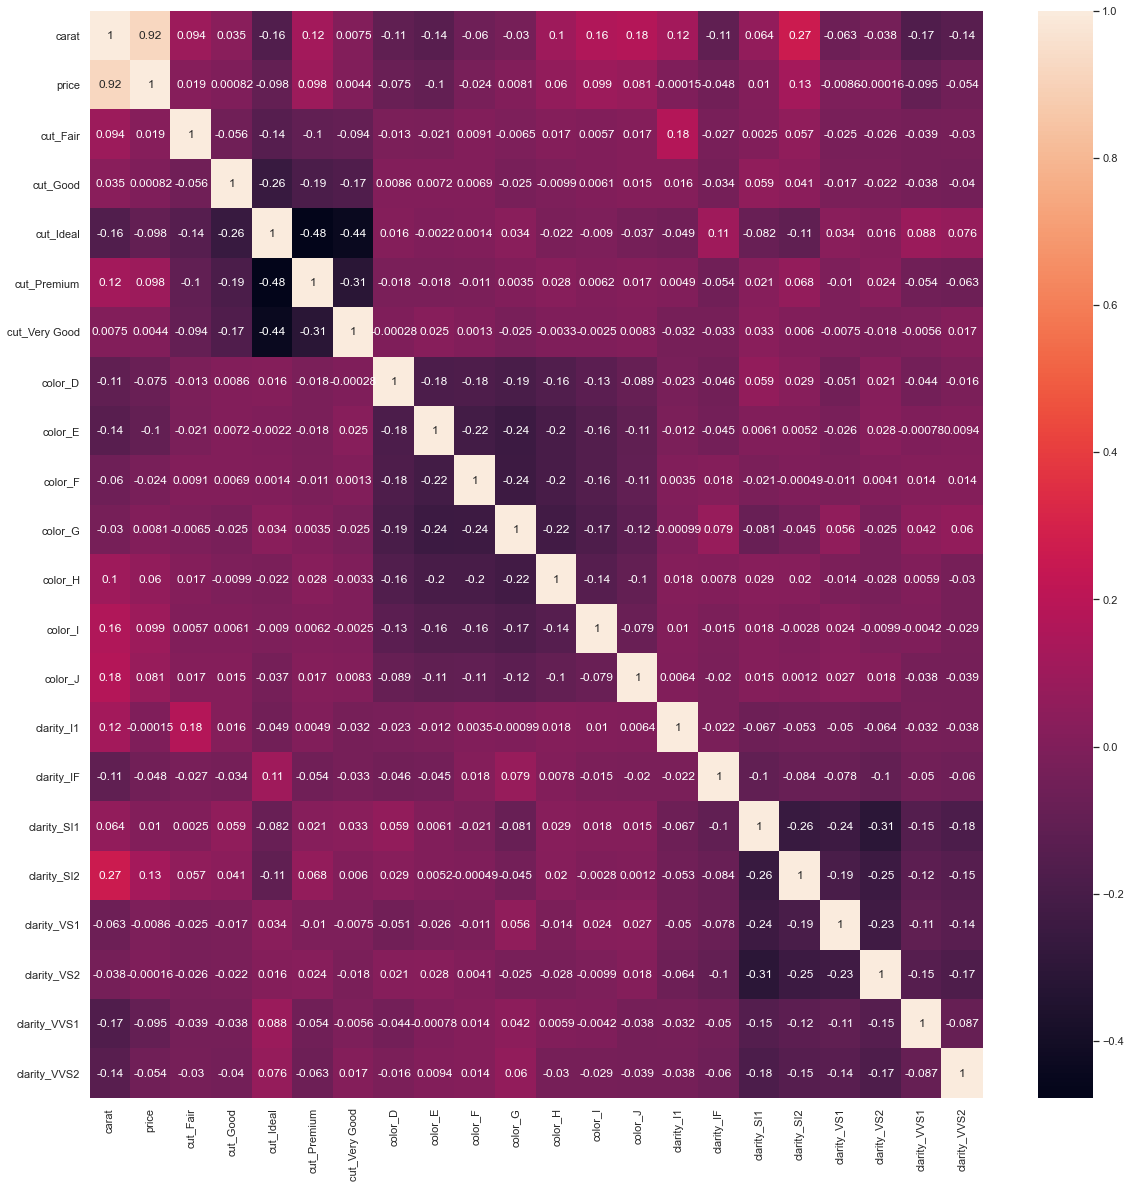

In [24]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(data.corr(), annot=True)

In [25]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 49990
Total # of sample in train dataset: 39992
Total # of sample in test dataset: 9998


In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [28]:
model = LinearRegression()
model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('Linear Regression')
print('Score : %.4f' % model.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Linear Regression
Score : 0.9159
[0.91717872 0.915418   0.91607104 0.91806174 0.91424307]

MSE    : 1318978.21 
MAE    : 805.01 
RMSE   : 1148.47 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [29]:
y_test

47839     9248.0
34690    15708.0
47245      720.0
6713      4928.0
33250    10619.0
          ...   
39087      663.0
24385     5143.0
21108     5387.0
35893     5400.0
33124     5988.0
Name: price, Length: 9998, dtype: float64

In [30]:
y_pred

array([ 7978.63542939, 14179.63542939,    47.63542939, ...,
        5677.13542939,  5731.51042939,  6272.06209172])

### Best model: RandomForest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('Random Forest')
print('Score : %.4f' % model.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.2s finished



Random Forest
Score : 0.9778
[0.97689053 0.97840265 0.97821693 0.97764552 0.97799588]

MSE    : 347377.72 
MAE    : 295.75 
RMSE   : 589.39 
R2     : 0.98 


### KNeighbors Regressor with Grid Search

In [32]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('KNeighbours Regression')
print('Score : %.4f' % model.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.8s finished



KNeighbours Regression
Score : 0.9685
[0.96247957 0.96454497 0.95846005 0.96335921 0.96521151]

MSE    : 494392.49 
MAE    : 336.30 
RMSE   : 703.13 
R2     : 0.97 


In [33]:
grid_params= {
    'n_neighbors':[3,5,7,8,9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [34]:
gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs = -1
)

In [35]:
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.6min finished


In [36]:
gs_result.best_score_ #no need to update

0.9660540422345266

In [37]:
gs_result.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [38]:
gs_result.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Future Work: PCA after one-hot encoding. Experience other regression models.